In [1]:
#data manupulation library
import numpy as np
import pandas as pd


#visualization library
import dabl
import matplotlib.pyplot as plt
import seaborn as sns


#machine learning library
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer

In [2]:
df = pd.read_csv('/Users/yipingzhou/diabetes/Diab_pyth_data.csv')

In [3]:
df.head()

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
0,153.0,225.0,57.0,Female,0.0,0.0,18.0,1.0,69.50
1,156.0,211.0,63.0,Male,0.0,1.0,17.0,0.0,69.25
2,85.0,139.0,60.0,Male,0.0,0.0,18.0,0.0,14.50
3,126.0,149.0,40.0,Male,1.0,0.0,28.0,0.0,62.00
4,117.0,156.0,46.0,Male,1.0,1.0,29.0,0.0,52.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15251 entries, 0 to 15250
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Glucose Before fasting                       15231 non-null  float64
 1   Glucose Anytime                              15233 non-null  float64
 2   Age                                          15223 non-null  float64
 3   Sex                                          15228 non-null  object 
 4   Blood Pressure                               15222 non-null  float64
 5   Family member with Diabetes past or present  15224 non-null  float64
 6   BMI                                          15238 non-null  float64
 7   Pregnancies                                  15237 non-null  float64
 8   percentage of occuring diabetes              15251 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [5]:
sum(df.isnull().sum())/df.shape[0]

0.011277948986951676

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15104 entries, 0 to 15250
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Glucose Before fasting                       15104 non-null  float64
 1   Glucose Anytime                              15104 non-null  float64
 2   Age                                          15104 non-null  float64
 3   Sex                                          15104 non-null  object 
 4   Blood Pressure                               15104 non-null  float64
 5   Family member with Diabetes past or present  15104 non-null  float64
 6   BMI                                          15104 non-null  float64
 7   Pregnancies                                  15104 non-null  float64
 8   percentage of occuring diabetes              15104 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


# Exploratory Data Analysis  for dataset

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. The objective of the dataset is to diagnostically predict how much chance a patient has diabetes, based on certain diagnostic measurements included in the dataset.

We will explore this dataset and find out factors that contribute the most for diabetes causation. We will also build Machine Learning Models that can help to predict the chance a person has diabetic and try to improve the model by performing Cross Validation and hyperparameter tuning.

The different columns present in the dataset are:
Glucose Before fasting -> Fasting blood sugar level (mg/dL )
Glucose Anytime -> Random blood sugar test level (mg/dL) 
Age -> Age in years
Sex -> Gender
Blood Pressure -> High blood pressure(1) or not(0)
Family member with Diabetes past or present -> 1 or 0 
BMI -> Body Mass Index
Pregnancies -> Have Pregnancy(1) or not(0)
percentage of occuring diabetes -> Chance of having  diabetes (%)

Explore the correlation between our target and categorical and numerical features using Tableau.

/Users/yipingzhou/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like regression


/Users/yipingzhou/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/yipingzhou/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/yipingzhou/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/yipingzhou/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


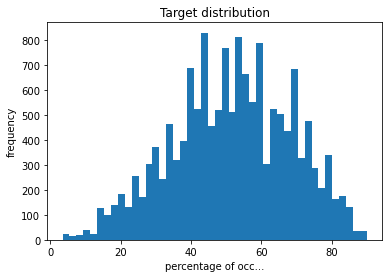

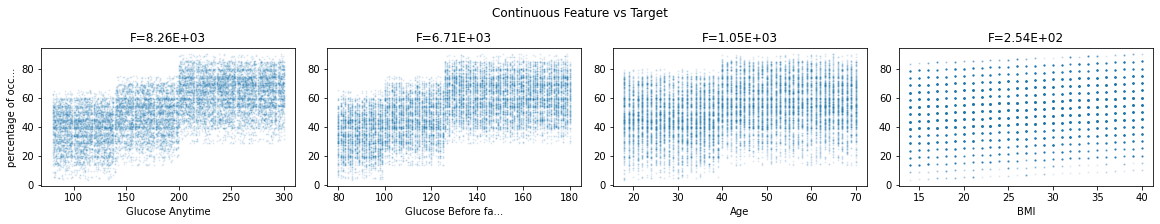

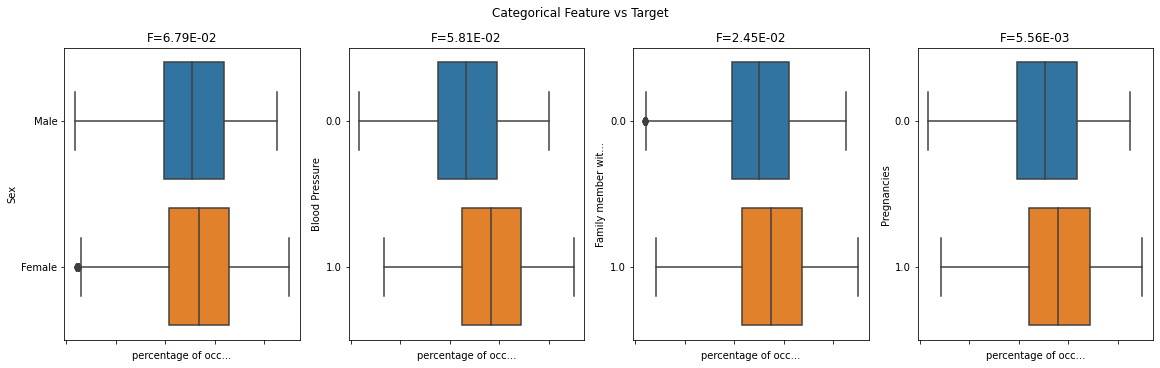

In [8]:
dabl.plot(df, 'percentage of occuring diabetes')
plt.show()

<img src="Screen_Shot_1.png"/>

Conclusion: In this boxplt, Sex defference have slightly impact on diabetes. Females are more likely to have diabetes than males, which is contradictory to medical study of diabetes.
Refenrence source:https://www.cdc.gov/diabetes/library/features/diabetes-and-men.html

<img src="Screen_Shot_2.png"/>

Conclusion: In this boxplt, Pregnancy defference have slightly impact on diabetes. Pregnancy are more likely to have diabetes than non-pregnancy.

<img src="Screen_Shot_3.png"/>

Conclusion: Blood pressure and diabetes are highly correlated.
Reference source: https://www.webmd.com/diabetes/high-blood-pressure

<img src="Screen_Shot_4.png"/>

Conclusion: When people are over 40s, the chance of occurring diabetes is higher.
Reference source: https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes

<img src="Screen_Shot_5.png"/>

Conclusion: Increased BMI is associated with increased prevalence of diabetes mellitus.
Reference source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1890993/

***

# Building ML Model for Diabetes Prediction

The model was deemed to be the regression model, we use LinearRegression and RidgeRegression to predict the percentage of occurring diabetes.

In [14]:
neg_mean_squared_error =[]
model_names =[]


X= df.drop('percentage of occuring diabetes', axis=1)
y= df['percentage of occuring diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,['Sex']),(s,['Glucose Before fasting','Glucose Anytime','BMI','Age']),remainder='passthrough') 

Ln = LinearRegression()
Rr = Ridge()

model_names =[Ln,Rr]

for model in model_names: 
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores = np.mean(cross_val_score(pipe, X, y, cv=5))
    print (f'model : {model} and  neg_mean_squared_error is : {round(scores,10)}')

model_names = ['LinearRegression','Ridge']
result_df1 = pd.DataFrame({'Accuracy':scores}, index=model_names)
result_df1

model : LinearRegression() and  neg_mean_squared_error is : 0.8549945564
model : Ridge() and  neg_mean_squared_error is : 0.8549946556


,Accuracy
LinearRegression,0.854995
Ridge,0.854995


In [15]:
neg_mean_squared_error =[]
model_names =[]


X= df.drop('percentage of occuring diabetes', axis=1)
y= df['percentage of occuring diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,['Sex']),(s,['Glucose Before fasting','Glucose Anytime','BMI','Age']),remainder='passthrough') 

Ln = LinearRegression()
Rr = Ridge()

model_names =[Ln,Rr]

for model in model_names: 
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores = np.mean(cross_val_score(pipe, X, y, cv=5))
    print (f'model : {model} and  CV_score is : {round(scores,10)}')

model_names = ['LinearRegression','Ridge']
result_df1 = pd.DataFrame({'Accuracy':scores}, index=model_names)
result_df1

model : LinearRegression() and  CV_score is : 0.8549945564
model : Ridge() and  CV_score is : 0.8549946556


,Accuracy
LinearRegression,0.854995
Ridge,0.854995
